In [189]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [191]:
path="/content/drive/MyDrive/data sets/raw_tweets_queens_death.xlsx"
df=pd.read_excel(path)

In [386]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.568087e+18,1.568036e+18,2022-09-09 04:00:52 UTC,2022-09-09,04:00:52,0,1.548680e+18,jasonkhumaloii,DonOne,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '929512031224336384', 'username': ...",NaN,NaN,NaN,NaN
1,1.568087e+18,1.568087e+18,2022-09-09 04:00:52 UTC,2022-09-09,04:00:52,0,1.142877e+18,therhancock19,Itâ€™s Ryne,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,1.568087e+18,1.568087e+18,2022-09-09 04:00:51 UTC,2022-09-09,04:00:51,0,1.546216e+18,lucky694321,Wyles & Lucky,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1.568087e+18,1.568087e+18,2022-09-09 04:00:51 UTC,2022-09-09,04:00:51,0,1.515708e+18,djdanstarbwoy,Dj Dan Starboy,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1.568087e+18,1.568087e+18,2022-09-09 04:00:51 UTC,2022-09-09,04:00:51,0,1.435264e+18,yournewsobsess1,YourNewsObsession | Celebrity Gossip Blog,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602359 entries, 0 to 602358
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               602359 non-null  float64       
 1   conversation_id  602359 non-null  float64       
 2   created_at       602359 non-null  object        
 3   date             602359 non-null  datetime64[ns]
 4   time             602359 non-null  object        
 5   timezone         602359 non-null  int64         
 6   user_id          602359 non-null  float64       
 7   username         602359 non-null  object        
 8   name             602289 non-null  object        
 9   place            576 non-null     object        
 10  tweet            602358 non-null  object        
 11  language         602359 non-null  object        
 12  mentions         602359 non-null  object        
 13  urls             602359 non-null  object        
 14  photos           602

In [388]:
df.isnull().sum() #SHOWS NUMBER OF NULL VALUES IN EACH COLUMN.

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   70
place              601783
tweet                   1
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            602359
quote_url          553837
video                   0
thumbnail          397772
near               602359
geo                602359
source             602359
user_rt_id         602359
user_rt            602359
retweet_id         602359
reply_to                0
retweet_date       602359
translate          602359
trans_src          602359
trans_dest         602359
dtype: int64

In [389]:
df.corr() #CORRELATION BETWEEN DIFFERENT COLUMNS OF THE DATAFRAME

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,retweet,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
id,1.000000,-0.002270,NaN,0.031089,-0.010107,-0.010203,-0.011897,NaN,-0.027676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conversation_id,-0.002270,1.000000,NaN,0.008891,0.000224,0.000388,0.000441,NaN,-0.000429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timezone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,0.031089,0.008891,NaN,1.000000,-0.014492,-0.006759,-0.008352,NaN,-0.002380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
replies_count,-0.010107,0.000224,NaN,-0.014492,1.000000,0.407095,0.472747,NaN,0.014109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweets_count,-0.010203,0.000388,NaN,-0.006759,0.407095,1.000000,0.832937,NaN,0.017171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likes_count,-0.011897,0.000441,NaN,-0.008352,0.472747,0.832937,1.000000,NaN,0.014354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video,-0.027676,-0.000429,NaN,-0.002380,0.014109,0.017171,0.014354,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
near,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
df.shape #  TELLS US ABOUT THE DIMENSION OF THE DATAFRAME

(602359, 36)

## Q1 THE USER WITH MOST RETWEETS

In [391]:
# FINDING THE USER WITH MOST RETWEETS

In [392]:
df_temp=df[['retweets_count']] # CREATING A NEW DATAFRAME

In [393]:
df_temp.head()

,retweets_count
0,0
1,0
2,0
3,0
4,0


In [394]:
df_temp['retweets_count'].unique() # UNIQUE VALUES IN COLUMN.

array([    0,     1,     2,     4,     5,     3,     6,    13,    11,
          15,     7,    10,     8,     9,    24,    27,    40,    69,
          14,    20,    22,    25,    43,    32,    16,    12,    46,
          17,   110,    41,    31,    33,    49,    68,    18,    73,
          21,   100,   113,    55,    19,    23,    38,   117,    58,
         133,   229,   159,    29,    44,    63,   341,    45,    42,
          35,   131,    60,    82,    96,    59,    83,    61,   153,
         111,    39,   129,   171,   160,   847,   128,    48,   218,
         648,   313,   140,    98,    34,    30,    50,   211,    37,
          62,   301,   232,   356,   118,    77,   161,    47,    36,
          78,    88,   212,    89,  1194,   202,    28,   400,    26,
          56,    57,    85,   146,    76,   324,   114,   216,    84,
         321,   135,   490,    52,    64,   328,  1381,   124,   162,
          51,   134,    90,   125,   102,   122,    95,  1056,    86,
         930,    94,

In [395]:
maxi=df_temp['retweets_count'].max()

In [396]:
df_maxretweets=df[df['retweets_count']==maxi]

In [397]:
df_maxretweets # DATA OR ROW OF USER WITH MAXIMUM RETWEETS
# THE USER WITH MAXIMUM RETWEETS IS "yasmin" username-"ycsm1n" no. of retweets--"52542"

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
418318,1.567941e+18,1.567941e+18,2022-09-08 18:19:31 UTC,2022-09-08,18:19:31,0,1.276736e+18,ycsm1n,yasmin,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


## Q4 VISUALIZE RELATIONSHIP BETWEEN LIKES RETWEETS AND REPLIES

In [398]:
# QUESTION4 VISUALISE AND EXPLAIN A RELATION BETWEEN LIKES RETWEETS AND REPLIES

In [399]:
df4=df[['likes_count','retweets_count','replies_count']] # CREATING A NEW DATAFRAME

In [400]:
df4.head()

,likes_count,retweets_count,replies_count
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


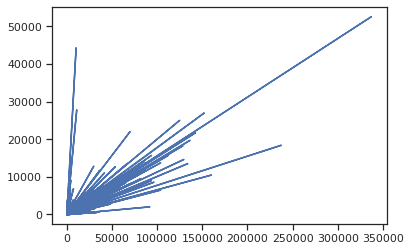

In [401]:
#plotting relation between likes count and retweets count
plt.plot(df4['likes_count'],df4['retweets_count'])

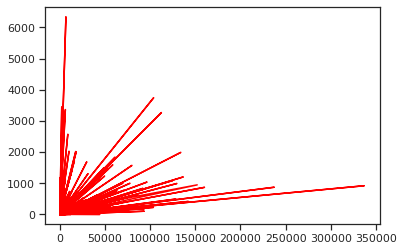

In [402]:
plt.plot(df4['likes_count'],df4['replies_count'],color='red')

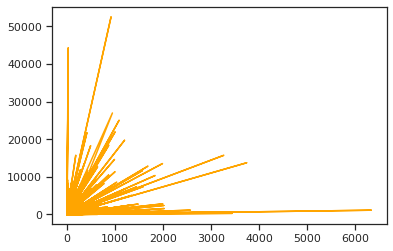

In [403]:
plt.plot(df4['replies_count'],df4['retweets_count'],color='orange')

In [404]:
# THE ABOVE DATA SHOWS THAT IF ONE OF ANY COLUMNS INCREASES HTHE COUNTERPART ALSO INCREASES.
# THIS CLEARLY SHOWS A POSITIVE RELATION BETWEEN THEM
 

In [405]:
df4.corr()

,likes_count,retweets_count,replies_count
likes_count,1.000000,0.832937,0.472747
retweets_count,0.832937,1.000000,0.407095
replies_count,0.472747,0.407095,1.000000


In [406]:
import seaborn as sns # IMORTING SEABORN

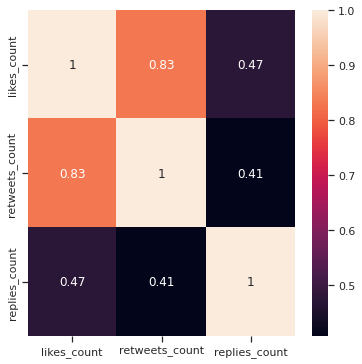

In [407]:
plt.figure(figsize=(6,6))
sns.heatmap(df4.corr(),annot=True) # PLOTTING A CORRELATION GRAPH

In [408]:
# THE FOLLOWING GRAPH SHOWS CORELATION BETWEEN THE FEATURES (LIGHTER THE COLOR MEANS HIGHER THE CORELATION)
# FOR EXAMPLE IF A TWEET HAS HIGHER LIKES_COUNTS THEIR IS HIGH CHANCE THAT IT WILL HAVE HIGHER RETWEET_COUNTS.

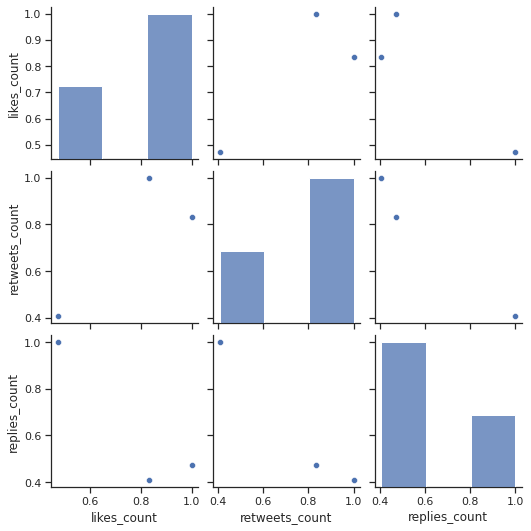

In [409]:
sns.pairplot(df4.corr())

In [410]:
df4['likes_count'].value_counts()

0        277877
1        111026
2         52037
3         30351
4         20369
          ...  
3635          1
1971          1
5611          1
1637          1
12213         1
Name: likes_count, Length: 2449, dtype: int64

### Q5 DOES A VIDEO IN A TWEET MAKE IT MORE LIKEABLE?

In [411]:
# DOES A VIDEO HAVE MORE LIKEABLE IF IT HAS A VIDEO

In [412]:
# WE WILL EXTRACT A NEW DATAAFRAME THAT WILL HAVE VIDEO AND LIKES_COUNTS

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602359 entries, 0 to 602358
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               602359 non-null  float64       
 1   conversation_id  602359 non-null  float64       
 2   created_at       602359 non-null  object        
 3   date             602359 non-null  datetime64[ns]
 4   time             602359 non-null  object        
 5   timezone         602359 non-null  int64         
 6   user_id          602359 non-null  float64       
 7   username         602359 non-null  object        
 8   name             602289 non-null  object        
 9   place            576 non-null     object        
 10  tweet            602358 non-null  object        
 11  language         602359 non-null  object        
 12  mentions         602359 non-null  object        
 13  urls             602359 non-null  object        
 14  photos           602

In [414]:
df5=df[['likes_count','video']] # creating a new dataframe from existing dataframe df.

In [415]:
df5.shape

(602359, 2)

In [416]:
df5.info() # THEIR ARE NO NULL VALUES IN THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602359 entries, 0 to 602358
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   likes_count  602359 non-null  int64
 1   video        602359 non-null  int64
dtypes: int64(2)
memory usage: 9.2 MB


In [417]:
df5

,likes_count,video
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
602354,1,0
602355,0,0
602356,2,1
602357,12213,1


In [418]:
# IN THE ABOVE DATA FRAME WE SEE THAT IF A TWEET HAS VIDEO IT IS DENOTED BY 1 ELSE 0

[Text(0, 0.5, 'LIKES COUNT')]

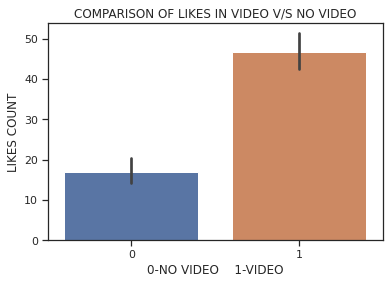

In [419]:
sns.set(style='ticks')
y=sns.barplot(x=df5['video'],y=df5['likes_count'])
y.set(title='COMPARISON OF LIKES IN VIDEO V/S NO VIDEO')
y.set(xlabel='0-NO VIDEO    1-VIDEO')
y.set(ylabel='LIKES COUNT')

In [420]:
# WE CAN CONCLUDE THAT TWEETS WITH A VIDEO HAVE AN AVERAGE LIKES COUNT IN RANGE(40-50)
# ALSO TWEETS WITHOUT VIDEOS HAVE A LIKES COUNT IN RANGE (10-20)
# IT CAN BE CLEARY SEEN THAT A VIDEO IS MORE LIKELY TO MAKE A TWEET MORE LIKEABLE

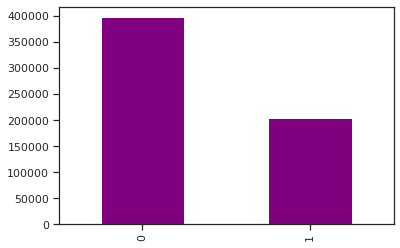

In [421]:
# comparing video tweets to non video tweets
df5['video'].value_counts().plot(kind='bar',color='purple')

In [422]:
#FINDING CORELATION BETWEEN THESE

In [423]:
df5.corr()

,likes_count,video
likes_count,1.000000,0.014354
video,0.014354,1.000000


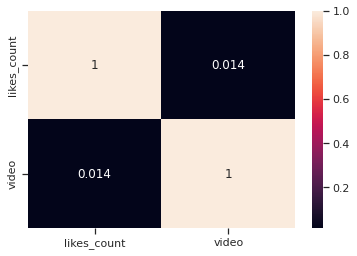

In [424]:
sns.heatmap(df5.corr(),annot=True)

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602359 entries, 0 to 602358
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               602359 non-null  float64       
 1   conversation_id  602359 non-null  float64       
 2   created_at       602359 non-null  object        
 3   date             602359 non-null  datetime64[ns]
 4   time             602359 non-null  object        
 5   timezone         602359 non-null  int64         
 6   user_id          602359 non-null  float64       
 7   username         602359 non-null  object        
 8   name             602289 non-null  object        
 9   place            576 non-null     object        
 10  tweet            602358 non-null  object        
 11  language         602359 non-null  object        
 12  mentions         602359 non-null  object        
 13  urls             602359 non-null  object        
 14  photos           602

In [426]:
df['language'].value_counts()

en     451966
es      25962
cy      19677
und     13531
tr      13111
        ...  
dv          3
km          2
lo          1
bo          1
hy          1
Name: language, Length: 68, dtype: int64

## Q2 FINDING MOST EFFECTIVE TWEETS.

In [569]:
#FINDING THE MOST EFFECTIVE TWEET

In [570]:
y=df['likes_count'].nlargest(n=10)

In [571]:
y

418318    337168
426851    237498
381915    160094
519067    152105
406616    142341
335211    136379
494593    133932
348449    129615
507403    128502
505312    124930
Name: likes_count, dtype: int64

In [572]:
df_like=df[df['likes_count']>=124930] # TOP 10 TWEETS WITH MOSK LIKE

In [573]:
df_like.shape

(10, 36)

In [574]:
y2=df_like['retweets_count'].nlargest(5)

In [575]:
y2

418318    52542
519067    26967
505312    25004
406616    21698
335211    19703
Name: retweets_count, dtype: int64

In [576]:
df_like=df_like[df_like['retweets_count']>=19703] # TOP 5 TWEET OUT OF THE 10 WITH MOST REPLIES

In [577]:
y3=df_like['replies_count'].nlargest(1)

In [578]:
y3

335211    1200
Name: replies_count, dtype: int64

In [579]:
df_like=df_like[df_like['replies_count']==1200] # top DATA FROM IT WHICH HAS MAX RETWEETS.

In [580]:
df_like

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
335211,1.567949e+18,1.567949e+18,2022-09-08 18:51:12 UTC,2022-09-08,18:51:12,0,571964518.0,trollfootball,Troll Football,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


## WE CAN CONCLUDE THAT trollfootball IS THE MOST EFFECTIVE TWEET.

In [581]:
df_like.shape

(1, 36)

In [582]:
df_like['language'].value_counts() #LANGUAGE OF TWEET OF MOST EFFECTIVENESS.

en    1
Name: language, dtype: int64

In [583]:
# ACOORDING TO MY ANALYSIS OF THE DATA THE PARAMETERS TAKEN INTO CONSIDERATION (LIKES,REPLIES,RETWEETS) USER ID WITH INDEX 418318
# IS THE MOST EFFECTIVE TWEET.

## Q3 SHOWING LANGUAGE DISTRIBUTION AND PLACE DISTRIBUTION

## LANGUAGE DISTRIBUTION LIST

In [584]:
lang=list(df['language'].value_counts())

In [585]:
print(lang) # have frequency of all languages

[451966, 25962, 19677, 13531, 13111, 11935, 11484, 10217, 6296, 4841, 4390, 3978, 3591, 3237, 2750, 2186, 1928, 1777, 1767, 1248, 887, 721, 678, 657, 624, 392, 313, 313, 204, 191, 128, 123, 106, 89, 84, 80, 78, 68, 67, 58, 57, 56, 49, 42, 39, 39, 38, 36, 33, 32, 24, 23, 22, 22, 20, 18, 17, 11, 11, 11, 8, 6, 4, 3, 2, 1, 1, 1]


In [586]:
plc=list(df['place'].value_counts())

In [587]:
print(plc) # frequency of all places

[62, 20, 14, 13, 13, 13, 8, 7, 6, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [588]:
# merging both list
un=lang+plc

In [589]:
print(final)

[451966, 25962, 19677, 13531, 13111, 11935, 11484, 10217, 6296, 4841, 4390, 3978, 3591, 3237, 2750, 2186, 1928, 1777, 1767, 1248, 887, 721, 678, 657, 624, 392, 313, 313, 204, 191, 128, 123, 106, 89, 84, 80, 78, 68, 67, 58, 57, 56, 49, 42, 39, 39, 38, 36, 33, 32, 24, 23, 22, 22, 20, 18, 17, 11, 11, 11, 8, 6, 4, 3, 2, 1, 1, 1, 62, 20, 14, 13, 13, 13, 8, 7, 6, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [590]:
# NOW WE WILL TRY TO MAKE A DICTIONARY WITH VALUE COUNTS
lang_new=dict(df['language'].value_counts())

In [591]:
print(lang_new)

{'en': 451966, 'es': 25962, 'cy': 19677, 'und': 13531, 'tr': 13111, 'qme': 11935, 'fr': 11484, 'it': 10217, 'de': 6296, 'in': 4841, 'ar': 4390, 'pt': 3978, 'qht': 3591, 'ja': 3237, 'pl': 2750, 'tl': 2186, 'hi': 1928, 'el': 1777, 'nl': 1767, 'th': 1248, 'fa': 887, 'ur': 721, 'fi': 678, 'ht': 657, 'ca': 624, 'ta': 392, 'zh': 313, 'et': 313, 'ru': 204, 'ro': 191, 'sv': 128, 'mr': 123, 'da': 106, 'hu': 89, 'bn': 84, 'cs': 80, 'zxx': 78, 'ml': 68, 'ko': 67, 'gu': 58, 'eu': 57, 'uk': 56, 'no': 49, 'ne': 42, 'is': 39, 'sl': 39, 'te': 38, 'vi': 36, 'lv': 33, 'lt': 32, 'si': 24, 'kn': 23, 'iw': 22, 'or': 22, 'ps': 20, 'pa': 18, 'qam': 17, 'sr': 11, 'am': 11, 'bg': 11, 'ckb': 8, 'sd': 6, 'my': 4, 'dv': 3, 'km': 2, 'lo': 1, 'bo': 1, 'hy': 1}


In [592]:
plc_new=dict(df['place'].value_counts())

In [593]:
print({**lang_new,**plc_new})

{'en': 451966, 'es': 25962, 'cy': 19677, 'und': 13531, 'tr': 13111, 'qme': 11935, 'fr': 11484, 'it': 10217, 'de': 6296, 'in': 4841, 'ar': 4390, 'pt': 3978, 'qht': 3591, 'ja': 3237, 'pl': 2750, 'tl': 2186, 'hi': 1928, 'el': 1777, 'nl': 1767, 'th': 1248, 'fa': 887, 'ur': 721, 'fi': 678, 'ht': 657, 'ca': 624, 'ta': 392, 'zh': 313, 'et': 313, 'ru': 204, 'ro': 191, 'sv': 128, 'mr': 123, 'da': 106, 'hu': 89, 'bn': 84, 'cs': 80, 'zxx': 78, 'ml': 68, 'ko': 67, 'gu': 58, 'eu': 57, 'uk': 56, 'no': 49, 'ne': 42, 'is': 39, 'sl': 39, 'te': 38, 'vi': 36, 'lv': 33, 'lt': 32, 'si': 24, 'kn': 23, 'iw': 22, 'or': 22, 'ps': 20, 'pa': 18, 'qam': 17, 'sr': 11, 'am': 11, 'bg': 11, 'ckb': 8, 'sd': 6, 'my': 4, 'dv': 3, 'km': 2, 'lo': 1, 'bo': 1, 'hy': 1, "{'type': 'Point', 'coordinates': [51.5141, -0.1094]}": 62, "{'type': 'Point', 'coordinates': [57.14563414, -2.11172404]}": 20, "{'type': 'Point', 'coordinates': [54.0, -2.0]}": 14, "{'type': 'Point', 'coordinates': [51.50154346, -0.14128804]}": 13, "{'type':

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67],
 <a list of 68 Text major ticklabel objects>)

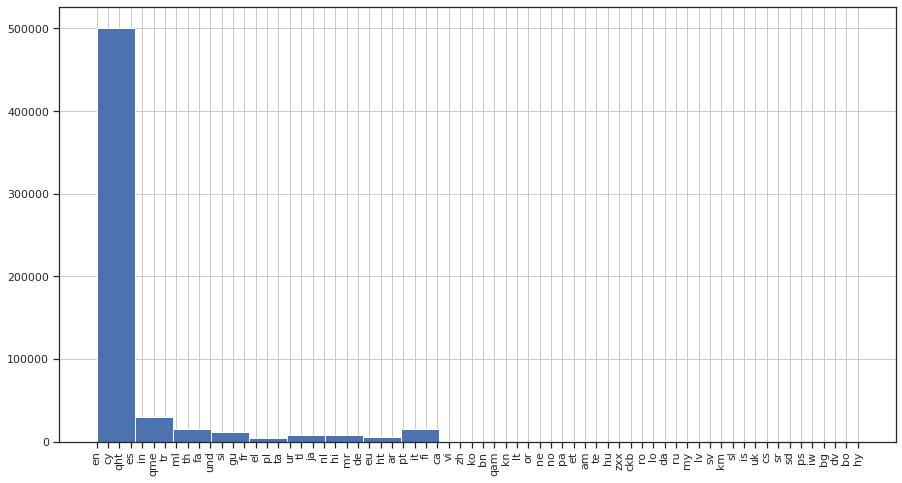

In [600]:
# PLOTTING THE DISTRIBUTION OF TWEETS w.r.t LANGUAGE.
plt.figure(figsize=(15,8))
df['language'].hist(bins=20)
plt.xticks(rotation='vertical')

In [595]:
# WE CAN SE ALMOST ALL OF THE TWEETS ARE MADE IN ENGLISH.

In [596]:
df_en['language'].value_counts()

en    451966
Name: language, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

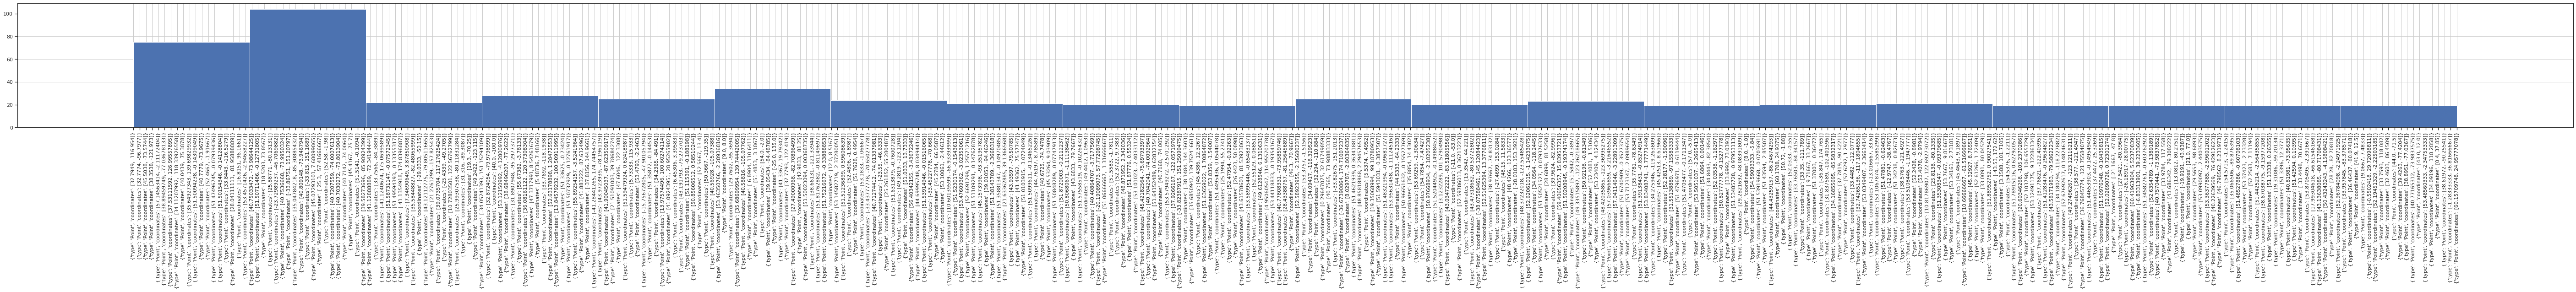

In [597]:
# PLOTTING THE DISTRIBUTION OF TWEET WITH PLACES.
plt.figure(figsize=(100,5))
df['place'].hist(bins=20)
plt.xticks(rotation='vertical')

In [598]:
# IT IS SEEN THAT ALMOST ALL THE PLACES HAVE TWEETED IN A FAIR SHARE.

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602359 entries, 0 to 602358
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               602359 non-null  float64       
 1   conversation_id  602359 non-null  float64       
 2   created_at       602359 non-null  object        
 3   date             602359 non-null  datetime64[ns]
 4   time             602359 non-null  object        
 5   timezone         602359 non-null  int64         
 6   user_id          602359 non-null  float64       
 7   username         602359 non-null  object        
 8   name             602289 non-null  object        
 9   place            576 non-null     object        
 10  tweet            602358 non-null  object        
 11  language         602359 non-null  object        
 12  mentions         602359 non-null  object        
 13  urls             602359 non-null  object        
 14  photos           602